# Численное интегрирование 
Методы:
 - Метод прямоугольника
 - Метод трапеций

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Объявление переменных

In [79]:
a = 0
b = 1
dx = 0.001
expect_int = 1

print("a =", a)
print("b =", b)
print("dx =", dx)

a = 0
b = 1
dx = 0.001


## Определение интегрируемой функции
$$f(x) = 3\cdot x^2$$

In [80]:
def F(x):
    return 3 * x ** 2

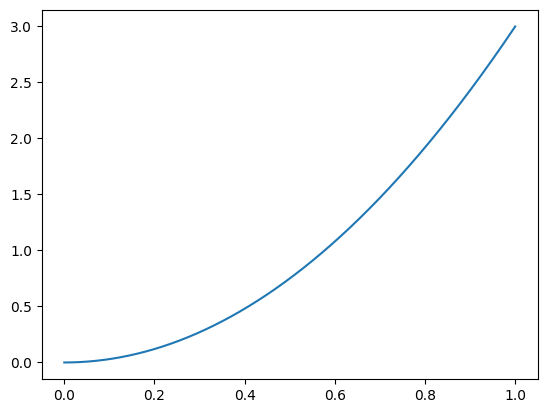

In [81]:
XX = np.arange(a, b + dx, dx)
YY = F(XX)

plt.plot(XX, YY)

## Метод прямоугольников

In [82]:
def IntegralRect(a, b, dx, f):
    S = 0
    n = (b+dx - a) / dx

    while(a < b):
        S += f(a)
        a += dx

    return S * dx, n

In [83]:
i_rect, n_rect = IntegralRect(a, b-dx, dx, F)

In [84]:
err_rect = abs(expect_int - i_rect)

print("Результат вычислений:", i_rect)
print("Уровень ошибки:", err_rect)
print("Количество итераций:", n_rect)

Результат вычислений: 0.9955064970000016
Уровень ошибки: 0.0044935029999984
Количество итераций: 1000.0


## Метод трапеции

In [85]:
def IntegralTrap(a, b, dx, f):
    S = 0
    n = (b+dx - a) / dx
    y1=f(a)
    a+=dx

    while(a < b):
        y2=f(a)
        S += y1+y2
        a+=dx
        y1=y2

    return S, n



In [86]:
i_rect, n_rect = IntegralTrap(a, b-dx, dx, F)

In [87]:
err_rect = abs(expect_int - i_rect)

print("Результат вычислений:", i_rect)
print("Уровень ошибки:", err_rect)
print("Количество итераций:", n_rect)

Результат вычислений: 1988.0249820000045
Уровень ошибки: 1987.0249820000045
Количество итераций: 1000.0
